In [8]:
import pandas as pd
import numpy as np


In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
sns.set(rc={'figure.figsize':(9,6)})

In [13]:
events_data = pd.read_csv('event_data_train.csv')

In [22]:
events_data.head()

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632


In [24]:
events_data['date']=pd.to_datetime(events_data.timestamp, unit='s')

In [27]:
events_data.head()

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35


In [31]:
events_data['day']=events_data.date.dt.date

In [32]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [30]:
submissions_data = pd.read_csv('submissions_data_train.csv')

In [36]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853


In [37]:
submissions_data['date']=pd.to_datetime(submissions_data.timestamp, unit='s')

In [39]:
submissions_data['day']=submissions_data.date.dt.date 

In [105]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


In [112]:
s_d = submissions_data.loc[submissions_data['submission_status'] == 'wrong']



In [123]:
s_d.head()

,step_id,timestamp,submission_status,user_id,date,day
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15
15,32031,1434363465,wrong,15853,2015-06-15 10:17:45,2015-06-15
33,32795,1434520465,wrong,15853,2015-06-17 05:54:25,2015-06-17
38,32812,1434346160,wrong,15853,2015-06-15 05:29:20,2015-06-15


In [125]:
s_d.groupby('step_id').agg({'submission_status':'count'}).sort_values('submission_status', ascending=False).head()





,submission_status
step_id,
31978,16084
32031,13373
32202,13002
33481,10300
32075,10003


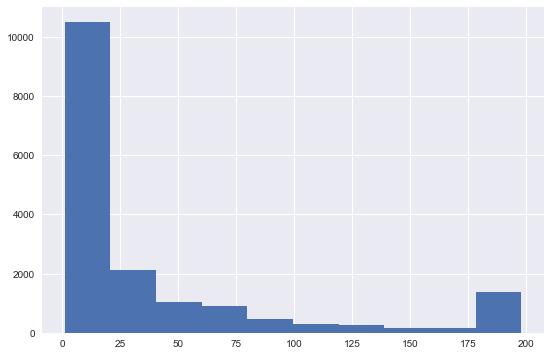

In [34]:
events_data[events_data.action == 'passed'] \
    .groupby('user_id', as_index=False) \
    .agg({'step_id': 'count'}) \
    .rename(columns={'step_id': 'passed_steps'}).passed_steps.hist()

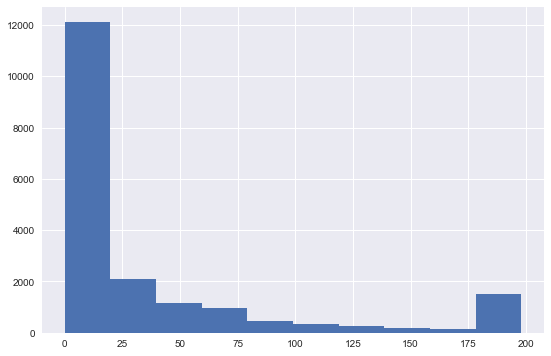

In [35]:
events_data.pivot_table(index='user_id', 
                       columns='action', 
                       values='step_id', 
                       aggfunc='count', 
                       fill_value=0).reset_index().discovered.hist()

In [43]:
users_scores = submissions_data.pivot_table(index='user_id', 
                       columns='submission_status', 
                       values='step_id', 
                       aggfunc='count', 
                       fill_value=0).reset_index()

In [104]:
users_scores.groupby('user_id').sum().reset_index().sort_values('correct', ascending=False).head()



submission_status,user_id,correct,wrong
439,1046,421,513
2099,5552,186,93
6415,17135,168,177
2344,6183,142,65
3208,8461,135,42


In [57]:
gap_data = events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day']) \
    .groupby('user_id')['timestamp'].apply(list) \
    .apply(np.diff).values

In [58]:
gap_data2 = pd.Series(np.concatenate(gap_data, axis=0))

In [61]:
gap_data3 = gap_data2 / (24 * 60 * 60)

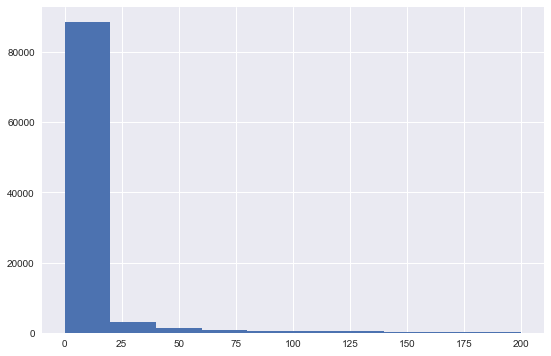

In [63]:
gap_data3[gap_data3 < 200].hist()

In [69]:
gap_data3.quantile(0.90)

18.325995370370403

In [78]:
gap_data3.quantile(0.90) / (24*60*60)

0.00021210642789780559

In [79]:
30 * 24 * 60 * 60

2592000

In [72]:
events_data.tail()

,step_id,timestamp,action,user_id,date,day
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19
3480702,33892,1526772811,viewed,18526,2018-05-19 23:33:31,2018-05-19


In [88]:
users_data = events_data.groupby('user_id', as_index=False) \
    .agg({'timestamp': 'max'}).rename(columns={'timestamp': 'last'})


In [90]:
now = 1526772811
drop_out_treshold = 2592000

In [97]:
users_data.head()

,user_id,last
0,1,1472827464
1,2,1519226966
2,3,1444581588
3,5,1499859939
4,7,1521634660


In [98]:
users_data.head()

,user_id,last
0,1,1472827464
1,2,1519226966
2,3,1444581588
3,5,1499859939
4,7,1521634660
